# Estadística


## Distribuciones muestrales.

### Distribucón Ji-Cuadrada (Chi-Cuadrada)

 - Si $X\sim N(0,1)$
 - $X^2 \sim \chi^{2}(1)$

 y si

 $$ \sum_{i=1}^n X_{i}^{2} \sim \chi^{2}(n) $$

 donde $X_{i}$ son v.a.i. con distribución normal

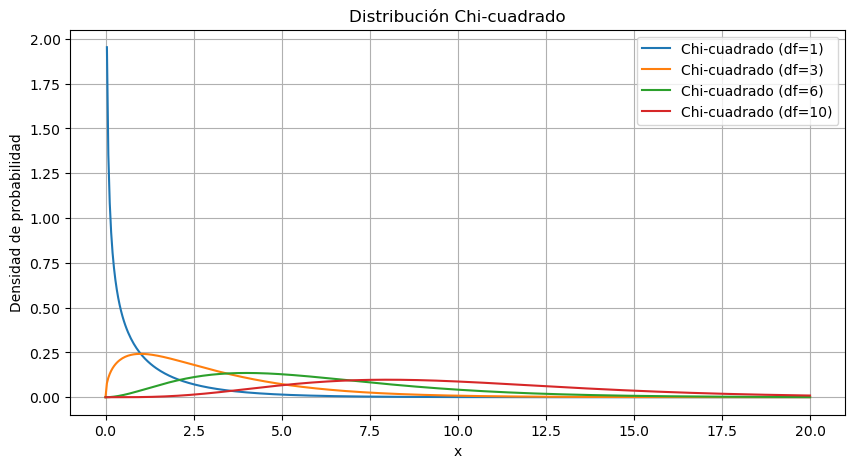

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Damos un rango de valores para las graficas
x_chi = np.linspace(0, 20, 500)

# Gráfica de la distribución Chi-cuadrado con diferentes grados de libertad
plt.figure(figsize=(10, 5))

df_chi_list = [1, 3, 6, 10] # Grados de libertad
for df in df_chi_list:
    plt.plot(x_chi, chi2.pdf(x_chi, df), label=f'Chi-cuadrado (df={df})')
plt.title('Distribución Chi-cuadrado')
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('Densidad de probabilidad') # Etiqueta del eje y
plt.legend()
plt.grid()
plt.show()

## Distribución $t$ de Student

Sean
- $X\sim N(0,1)$
- $Y \sim \chi^2(n-1)$
Entonces
$$ T = \frac{X\cdot \sqrt{n}}{\sqrt{\frac{Y}{n-1}}} \sim t(n-1)$$

Podemos decir que

$$ \lim_{n\to\infty}t(n) = N(0,1) $$

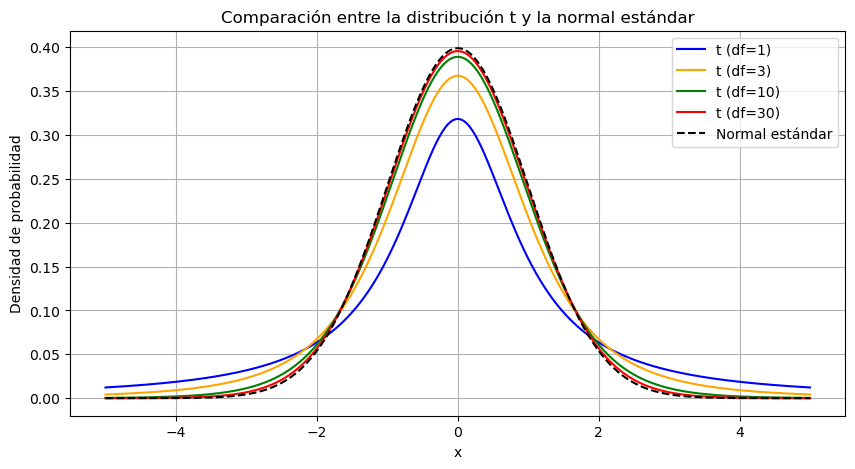

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Damos un rango de valores para las graficas
x = np.linspace(-5, 5, 500)

dfs = [1,3,10,30]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 5))

# Graficamos las distribuciones t de Student
for df, color in zip(dfs, colors): # asignar un color diferente a cada df
    plt.plot(x, t.pdf(x, df), label=f't (df={df})', color=color)

# Graficamos la distribución normal estándar
plt.plot(x, norm.pdf(x), 'k--', label='Normal estándar')

plt.title('Comparación entre la distribución t y la normal estándar')
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid() 
plt.show()


# Intervalos de confianza

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Intervalo de Confianza para la media de una distribución normal (σ conocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

### Nivel de significancia (error): $\alpha$

El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:

$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde
- $\sigma$ es la desviación estándar
- $\frac{\sigma}{\sqrt{n}}$ es el error estándar de la media
- $z_{\alpha/2}$ determina el nivel de confianza
- el intervalo está centrado en $\bar{X}$

**OBS** A mayor valor de $n$ -> menor error estándar -> el intervalo de confianza es más pequeño -> lo cual hace que se acerque más a la media, es decir, que haya menos variación.

**EJEMPLO 1** Para trata de estimar la media de consumo por cliente en un restaurante, se reunieron datos de una muestra de $49$ clientes durante tres semanas.

**a)** Supongamos que la **desviación estándar** de la población es de $\$2.5$. ¿Cuál es el error estándar de la media?

**b)** Con un nivel de confianza del $95\%$, ¿cuál es el margen de error?

**c)** Si la media de la muestra es de $\$22.60$ ¿cuál es el intervalo de confianza del $95\%$ para la media de la población? 

In [3]:
# Datos:
n = 49 
sigma = 2.5
media_muestral = 22.60
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
print(f"Eror estándar de la media: {error_estandar:.2f}")

# b) Margen de error
# 1-confianza= 0.05 => 0.025 en cada cola -> (1-confianza)/2

z = st.norm.ppf(1 - (1 - confianza) / 2) # ppf -> percentil point function
# z_{0.975} es tal que P(Z <= z_{0.975}) = 0.975
margen_error = z * error_estandar
print(f"Margen de error: {margen_error:.2f}")

# c) Intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error
print(f"Intervalo de confianza del {confianza*100}%: ({limite_inferior:.2f}, {limite_superior:.2f})")

Eror estándar de la media: 0.36
Margen de error: 0.70
Intervalo de confianza del 95.0%: (21.90, 23.30)


Por lo tanto, podemos decir que con un $95\%$ de confianza, se estima que el **consumo medio poblacional** está entre $\$21.90$ y $\$23.30$

**Ejemplo 2** Supongamos que se toma una muestra aleatoria de 100 personas para estimar la media del peso de una población, y se obtiene que la media muestral es de $70$ kg con una desviación estándar que es conocida de $10$ kg. Para un nivel de confianza del $95\%$, calcular el intervalo de confianza.

In [4]:
# Datos:
n = 100
sigma = 10
media_muestral = 70 
confianza = 0.95    
error_estandar = sigma / np.sqrt(n)

# Vamos a utilizar la función scipy.stats.norm.interval
# Sintaxis: scipy.stats.norm.interval(confidence = confianza, loc=media_muestral, scale=error_estandar)

intervalo = st.norm.interval(confianza, loc=media_muestral, scale=error_estandar)

print(f"Intervalo de confianza del {confianza*100}%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

Intervalo de confianza del 95.0%: (68.04, 71.96)


## Intervalo de Confianza para la media $\mu$ de una distribución normal ($\sigma$ deconocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

Si el tamaño de la muestra es menor a 30, se utiliza la $t$: 
### Estadístico t

Definimos el estadístico $t$ de la siguiente manera:
$$T = \frac{\bar{X}-\mu}{s/\sqrt{n}} \sim t_{(n-1)} $$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ desconocida) es:

$$
\left( \bar{X} - t_{\alpha/2} \frac{s}{\sqrt{n}}, \quad \bar{X} + t_{\alpha/2} \frac{s}{\sqrt{n}} \right)
$$
donde

- $s$ = desviación estándar muestral
- $\frac{s}{\sqrt{n}}$ = error estándar de la media  
- $t_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**Ejemplo 3** Supongamos que tenemos los soguientes datos de una muestra aleatoria de 10 observaciones:
$$ datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] $$
Calcular un intervalo de confianza para la media.

In [5]:
# Datos 
datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82]
n = len(datos)
confianza = 0.95
gl = n - 1

# Tenemos la media y el error estándar
media_muestral = np.mean(datos)
error_estandar = st.sem(datos) # std error of the mean utilizando la desviación estándar muestral

# Utilizamos la distribución t de Student
intervalo = st.t.interval(confianza, df=gl, loc=media_muestral, scale=error_estandar)
print(f"La media muestral es: {media_muestral:.2f}")
print(f"Intervalo de confianza del {confianza*100}%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")


La media muestral es: 71.00
Intervalo de confianza del 95.0%: (58.00, 84.00)


**Ejemplo 4** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.

La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8

**a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.

**b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

Estamos utilizado la formula para en b)

$$ \left(
 \frac{(n - 1) s^2}{\chi^2_{1 - \alpha/2}} ,
 \frac{(n - 1) s^2}{\chi^2_{\alpha/2}} 
\right) $$ 

In [6]:
from scipy.stats import chi2
#Datos:
n = 100
media_muestral = 1750
desviacion_muestral = 315.8 # varianza muestral = 99,729.64
confianza = 0.90

# a) Se tiene que n>30, por lo que usamos la normal
error_estandar = desviacion_muestral / np.sqrt(n)
intervalo_media = st.norm.interval(confianza, loc=media_muestral, scale=error_estandar)
print(f"Intervalo de confianza para la media del {confianza*100}%: ({intervalo_media[0]:.2f}, {intervalo_media[1]:.2f})")

# b) Intervalo de confianza para la varianza
gl = n - 1
alpha = 1 - confianza   
s2 = desviacion_muestral**2

# Vamos a calcular los cuantiles de la distribución chi-cuadrado
chi2_inf = st.chi2.ppf(alpha / 2, df=gl)
chi2_sup = st.chi2.ppf(1 - alpha / 2, df=gl)
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza para la varianza del {confianza*100}%: ({intervalo_varianza[0]:.2f}, {intervalo_varianza[1]:.2f})")

# Otra forma de calcular el intervalo de confianza para la varianza
chi2_inf, chi2_sup = chi2.interval(confianza, df=gl)
intervalo_varianza2 = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza para la varianza del {confianza*100}%: ({intervalo_varianza2[0]:.2f}, {intervalo_varianza2[1]:.2f})")


Intervalo de confianza para la media del 90.0%: (1698.06, 1801.94)
Intervalo de confianza para la varianza del 90.0%: (80123.49, 128146.72)
Intervalo de confianza para la varianza del 90.0%: (80123.49, 128146.72)


## Ejercicios IC

**Ejercicio 1** En una encuesta de una Universidad, 225 estudiantes son seleccionados al azar de los que toman cálculo y se les pregunta si cálculo es su materia favorita. 100 estudiantes responden que el cálculo es su materia favorita. Proporcione un intervalo de confianza del 95 %  para la proporción de todos los estudiantes que toman cálculo y que la consideran su materia favorita.  

In [7]:
from math import sqrt
from scipy import stats

#Datos
n = 225           #tamaño de muestra
x = 100           #estudiantes que respondieron que cálculo es su favorita
phat = x / n      #proporción muestral

#Nivel de confianza
conf = 0.95
alpha = 1 - conf
z = stats.norm.ppf(1 - alpha/2)  #valor crítico z

#Error estándar y margen
SE = sqrt(phat*(1 - phat)/n)
LI = phat - z*SE
LS = phat + z*SE

print(f"p̂ = {phat:.4f}")
print(f"z = {z:.4f}")
print(f"SE = {SE:.4f}")
print(f"IC95%: ({LI:.4f}, {LS:.4f})")

p̂ = 0.4444
z = 1.9600
SE = 0.0331
IC95%: (0.3795, 0.5094)


**Conclusión ejercicio 1:**

La proporción muestral de estudiantes que consideran el cálculo como su materia favorita es:

$$
\hat{p} = \frac{100}{225} = 0.4444 \; (44.44\%).
$$

Con un nivel de confianza del **95 %**, el intervalo estimado para la proporción poblacional es:

$$
IC_{95\%} = (0.3795,\; 0.5094)
$$

Esto significa que, con un **95 % de confianza**, podemos afirmar que la verdadera proporción de todos los estudiantes que toman cálculo y lo consideran su materia favorita se encuentra entre **37.95 % y 50.94 %**.

En otras palabras, aunque en la muestra el \(44\%\) dijo que cálculo es su materia favorita, la proporción real de toda la población que toma cálculo podría estar entre aproximadamente **38 % y 51 %**.

El intervalo no es demasiado amplio, lo que indica que la muestra de \(n=225\) estudiantes proporciona una estimación razonablemente precisa de la proporción poblacional.

**Ejercicio 2** Los datos $1.2,\ 2.1,\ 2.3,\ 1.9,\ 3.0,\ 1.5,\ 2.8,\ 2.4,\ 1.7,\ 2.6,\ 2.0,\ 1.8,\ 3.1,\ 2.2,\ 2.5$ se toman a partir de una distribución normal $N(\mu,\sigma^2)$ con $\mu$ desconocida.

**a)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$, dado que $\sigma =2$.

**b)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$.

**c)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\sigma^2$.

In [8]:
import statistics as st
from math import sqrt
from scipy import stats

datos = [1.2,2.1,2.3,1.9,3.0,1.5,2.8,2.4,1.7,2.6,2.0,1.8,3.1,2.2,2.5]

n = len(datos)
xbar = st.mean(datos)
sigma = 2      # desviación poblacional conocida
conf = 0.90
alpha = 1 - conf
z = stats.norm.ppf(1 - alpha/2)

SE = sigma / sqrt(n)
LI = xbar - z*SE
LS = xbar + z*SE

print("Ejercicio 2(a) — IC90% para μ con σ=2")
print(f"Media muestral = {xbar:.4f}")
print(f"z = {z:.4f}")
print(f"SE = {SE:.4f}")
print(f"IC90%: ({LI:.4f}, {LS:.4f})")

Ejercicio 2(a) — IC90% para μ con σ=2
Media muestral = 2.2067
z = 1.6449
SE = 0.5164
IC90%: (1.3573, 3.0561)


In [9]:
s = st.pstdev(datos) * sqrt(n/(n-1))  # desviación muestral (ddof=1)
df = n - 1
t = stats.t.ppf(1 - alpha/2, df)

SE = s / sqrt(n)
LI = xbar - t*SE
LS = xbar + t*SE

print("Ejercicio 2(b) — IC90% para μ con σ desconocida (t)")
print(f"s = {s:.4f}")
print(f"t = {t:.4f}")
print(f"SE = {SE:.4f}")
print(f"IC90%: ({LI:.4f}, {LS:.4f})")


Ejercicio 2(b) — IC90% para μ con σ desconocida (t)
s = 0.5444
t = 1.7613
SE = 0.1406
IC90%: (1.9591, 2.4542)


In [10]:
S2 = s**2
chi2_inf = stats.chi2.ppf(alpha/2, df)
chi2_sup = stats.chi2.ppf(1 - alpha/2, df)

LI = df*S2/chi2_sup
LS = df*S2/chi2_inf

print("Ejercicio 2(c) — IC90% para σ²")
print(f"S² = {S2:.4f}")
print(f"χ²_inf = {chi2_inf:.4f}, χ²_sup = {chi2_sup:.4f}")
print(f"IC90%: ({LI:.4f}, {LS:.4f})")

Ejercicio 2(c) — IC90% para σ²
S² = 0.2964
χ²_inf = 6.5706, χ²_sup = 23.6848
IC90%: (0.1752, 0.6315)


**Conclusión ejercicio 2:**


Se tomaron los datos:

$$
1.2,\,2.1,\,2.3,\,1.9,\,3.0,\,1.5,\,2.8,\,2.4,\,1.7,\,2.6,\,2.0,\,1.8,\,3.1,\,2.2,\,2.5
$$

La media muestral resultó ser:

$$
\bar{x} = 2.2067
$$

y la desviación estándar muestral:

$$
s = 0.5444
$$



a) Intervalo de confianza del 90% para $\mu$ con $\sigma = 2$ conocida

$$
IC_{90\%} = (1.3573,\; 3.0561)
$$

b) Intervalo de confianza del 90% para $\mu$ con $\sigma$ desconocida (uso de t)

$$
IC_{90\%} = (1.9591,\; 2.4542)
$$

c) Intervalo de confianza del 90% para $\sigma^{2}$

$$
IC_{90\%} = (0.1752,\; 0.6315)
$$



**Interpretación:**  

- Cuando la desviación estándar poblacional es **conocida** y se usa la distribución normal, el intervalo (a) es **más amplio** porque se está usando $\sigma = 2$ que es mayor a la desviación muestral observada.  
- Cuando $\sigma$ es **desconocida** y usamos la distribución t (b), el intervalo se estrecha un poco porque la variabilidad muestral resultó menor ($s=0.54$).  
- Para la **varianza** (c), el intervalo muestra que la dispersión verdadera puede estar entre aproximadamente $0.18$ y $0.63$, reflejando la incertidumbre sobre la variabilidad de la población.

En general, los intervalos confirman que la media poblacional $\mu$ se estima alrededor de $2.21$ con un margen moderado, y que la varianza $\sigma^2$ podría variar pero permanece en valores relativamente pequeños, indicando poca dispersión en los datos.


**Ejercicio 4** En un estudio de préstamos a estudiantes, el Departamento de Educación informó que los beneficiarios del fondo Stafford Loan deberían un promedio de \$12,658 al recibirse (*USA Today*, 5 de abril de 1995). Suponga que este promedio de deuda se basa en una muestra de 480 préstamos a estudiantes y que la desviación estándar de la población de las deudas al recibirse es \$2,000.

**a)** Determina un estimado de confianza del **90%** del promedio poblacional de la deuda.

**b)** Determina un estimado de confianza del **95%** del promedio poblacional de la deuda.

**c)** Determina un estimado de confianza del **99%** del promedio poblacional de la deuda.

**d)** Describe lo que sucede con el **ancho del intervalo de confianza** a medida que se **aumenta el nivel de confianza**. ¿Parece razonable? Explica tu respuesta.

In [12]:
from math import sqrt
from scipy import stats

# Datos
xbar = 12658     # media muestral
sigma = 2000     # desviación estándar poblacional conocida
n = 480
SE = sigma / sqrt(n)

def imprimir_ic(conf):
    alpha = 1 - conf
    z = stats.norm.ppf(1 - alpha/2)
    LI = xbar - z*SE
    LS = xbar + z*SE
    print(f"Nivel de confianza: {int(conf*100)}%")
    print(f"  z = {z:.3f}")
    print(f"  Error estándar (σ/√n) = {SE:.3f}")
    print(f"  Intervalo de confianza: [{LI:,.2f} , {LS:,.2f}]")
    print(f"  Ancho del intervalo: {LS - LI:,.2f}\n")
    return LS - LI


ancho_90 = imprimir_ic(0.90)
ancho_95 = imprimir_ic(0.95)
ancho_99 = imprimir_ic(0.99)

Nivel de confianza: 90%
  z = 1.645
  Error estándar (σ/√n) = 91.287
  Intervalo de confianza: [12,507.85 , 12,808.15]
  Ancho del intervalo: 300.31

Nivel de confianza: 95%
  z = 1.960
  Error estándar (σ/√n) = 91.287
  Intervalo de confianza: [12,479.08 , 12,836.92]
  Ancho del intervalo: 357.84

Nivel de confianza: 99%
  z = 2.576
  Error estándar (σ/√n) = 91.287
  Intervalo de confianza: [12,422.86 , 12,893.14]
  Ancho del intervalo: 470.28



Respuesta inciso d)

d) Análisis del ancho de los intervalos

- Ancho 90 %: $12,808.15 - 12,507.85 = 300.31$
- Ancho 95 %: $12,836.92 - 12,479.08 = 357.84$
- Ancho 99 %: $12,893.14 - 12,422.86 = 470.28$

Se observa que **el ancho del intervalo aumenta conforme crece el nivel de confianza**:  
90 % < 95 % < 99 %.  

Esto es **razonable**, porque al exigir mayor certeza (por ejemplo, 99 % en lugar de 90 %), necesitamos abarcar un rango más amplio para asegurar que el verdadero promedio poblacional esté contenido dentro del intervalo.

**Conclusiones ejercicio 4:**
- **a) IC 90 %**  
  El intervalo $[12{,}507.85 ,\; 12{,}808.15]$ significa que, con un **90 % de confianza**, el **promedio real** de la deuda que deben los estudiantes al recibir el préstamo está entre **12,507.85 y 12,808.15 dólares**.  
  Es decir, si repitiéramos muchas veces el muestreo y el cálculo, el 90 % de esos intervalos contendrían el verdadero promedio poblacional.

- **b) IC 95 %**  
  El intervalo $[12{,}479.08 ,\; 12{,}836.92]$ indica que, con **95 % de confianza**, el promedio poblacional se encuentra entre **12,479.08 y 12,836.92 dólares**.  
  Al aumentar el nivel de confianza de 90 % a 95 %, el intervalo se hizo **más amplio** para asegurar mayor probabilidad de contener el verdadero promedio.

- **c) IC 99 %**  
  El intervalo $[12{,}422.86 ,\; 12{,}893.14]$ muestra que, con **99 % de confianza**, el promedio poblacional podría estar entre **12,422.86 y 12,893.14 dólares**.  
  Al exigir un nivel de confianza aún mayor, el intervalo se vuelve todavía **más ancho** para garantizar que el valor real esté incluido con más certeza.

- **d) Análisis del ancho de los intervalos**  
  El ancho crece al aumentar el nivel de confianza:  
  $300.31$ (90 %) < $357.84$ (95 %) < $470.28$ (99 %).  
  Esto es **razonable**, porque para estar más seguros de que el verdadero promedio está dentro del intervalo, necesitamos cubrir un rango más amplio. A mayor certeza, mayor margen de seguridad.
